In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/Hansen_1985.csv")
raw_data.head()

,c,w,r,y,h,k,invest,lambda,productivity
0,-0.187977,0.859041,-3.366459,0.095447,-1.209881,2.438901,-1.302774,-0.008721,1.305328
1,-0.185934,0.861084,-3.353773,0.106779,-1.200592,2.438537,-1.264501,-0.002846,1.307371
2,-0.187463,0.859555,-3.358946,0.101242,-1.204600,2.437755,-1.281660,-0.005687,1.305842
3,-0.186056,0.860962,-3.350678,0.108728,-1.198521,2.437619,-1.256547,-0.001810,1.307249
4,-0.184152,0.862866,-3.342391,0.116879,-1.192274,2.438144,-1.230277,0.002392,1.309153


In [3]:
print(raw_data.columns.to_list())

['c', 'w', 'r', 'y', 'h', 'k', 'invest', 'lambda', 'productivity']


In [5]:
mapping = {
    "c": "Consumption",
    "w": "Real Wage",
    "r": "Real Interest Rate",
    "y": "Output",
    "h": "Hours Worked",
    "k": "Capital Stock",
    "invest": "Investment",
    "lambda": "Total Factor Productivity",
    "productivity": "Productivity"
}

raw_data = raw_data.rename(columns=mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Output')
print(idx)

   Consumption  Real Wage  Real Interest Rate    Output  Hours Worked  \
0    -0.187977   0.859041           -3.366459  0.095447     -1.209881   
1    -0.185934   0.861084           -3.353773  0.106779     -1.200592   
2    -0.187463   0.859555           -3.358946  0.101242     -1.204600   
3    -0.186056   0.860962           -3.350678  0.108728     -1.198521   
4    -0.184152   0.862866           -3.342391  0.116879     -1.192274   

   Capital Stock  Investment  Total Factor Productivity  Productivity  
0       2.438901   -1.302774                  -0.008721      1.305328  
1       2.438537   -1.264501                  -0.002846      1.307371  
2       2.437755   -1.281660                  -0.005687      1.305842  
3       2.437619   -1.256547                  -0.001810      1.307249  
4       2.438144   -1.230277                   0.002392      1.309153  
3


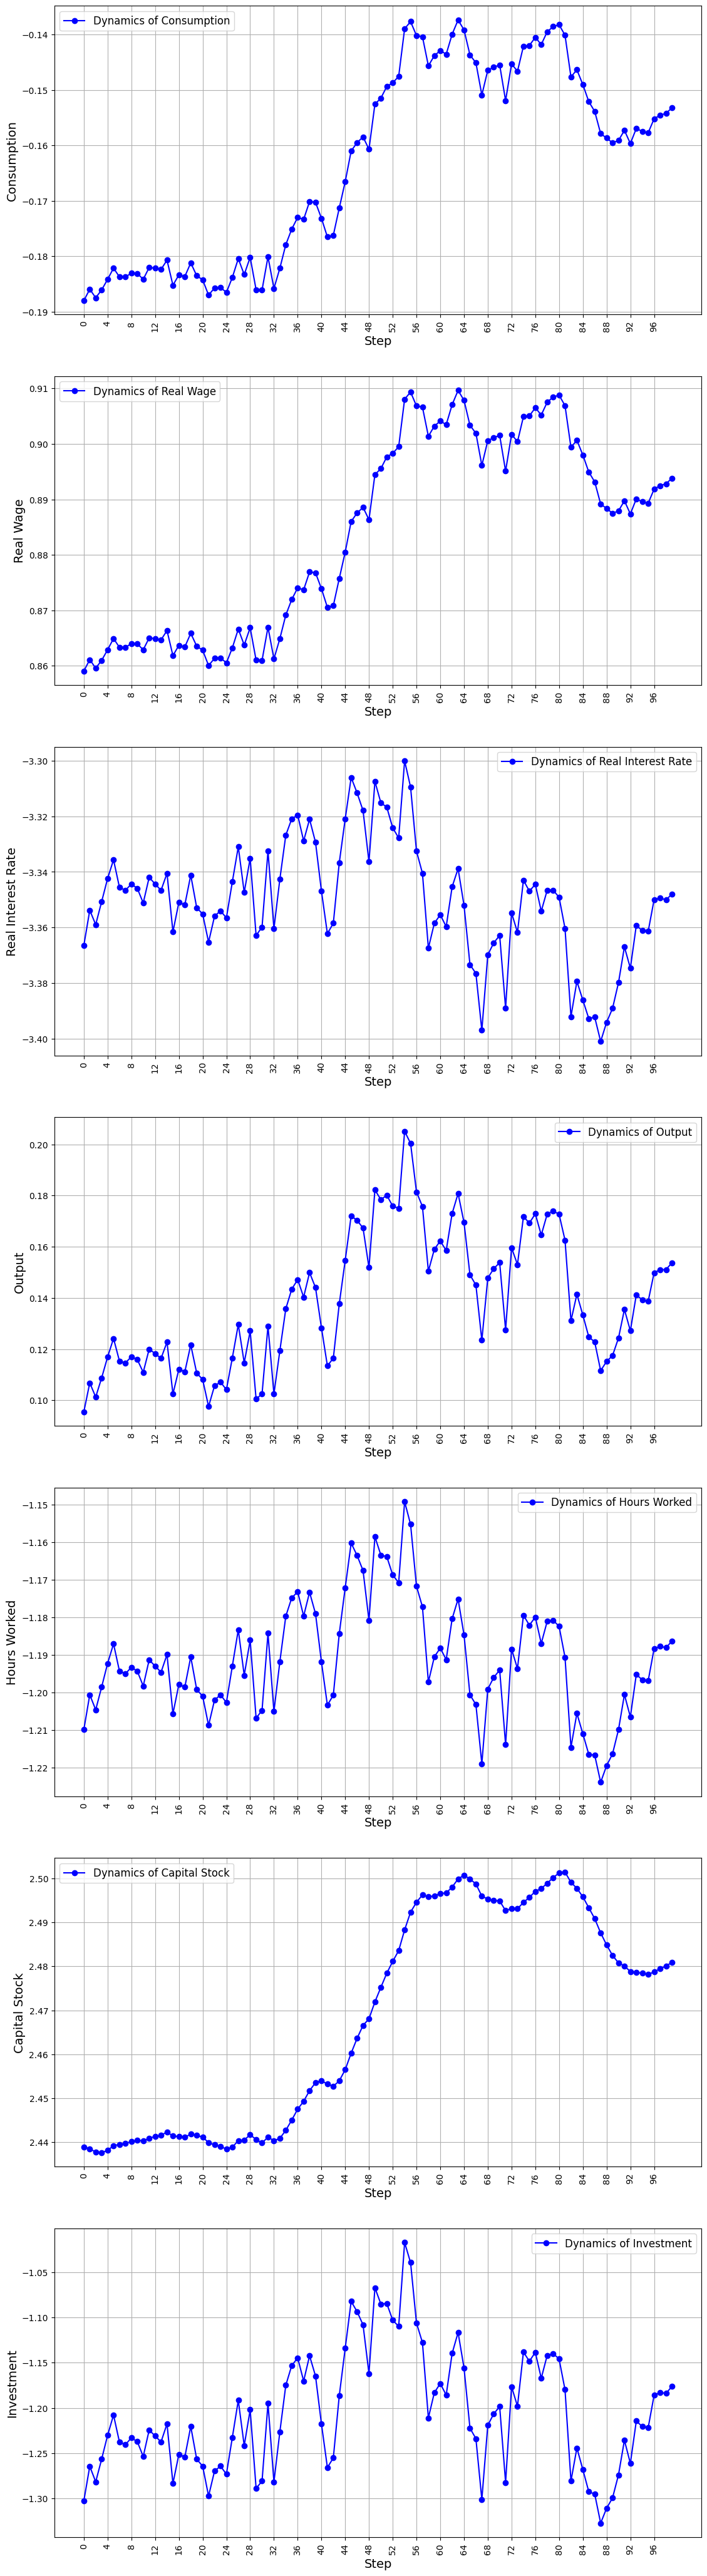

In [6]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Real Wage", "Real Interest Rate", "Output", "Hours Worked", "Capital Stock", "Investment"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)